<a href="https://colab.research.google.com/github/Abinaya-hub2006/Computer_Vision/blob/main/Image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

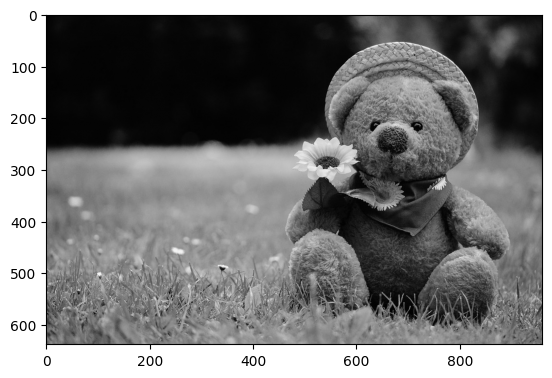

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/content/teddy.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.show()


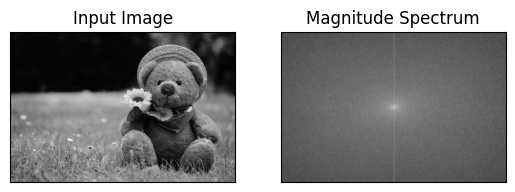

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread('/content/teddy.jpg', cv2.IMREAD_GRAYSCALE)

dft = np.fft.fft2(image)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20 * np.log(np.abs(dft_shift) + 1)

plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

Enter the values for a 3x3 sharpening kernel (row-wise):
Row 1: 1 3 4
Row 2: 0 9 8
Row 3: 1 2 3


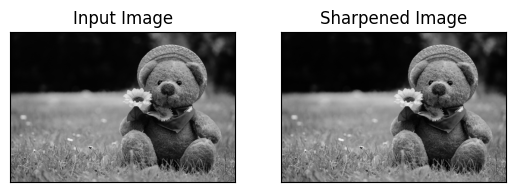

1276
1920


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and convert the image to grayscale
image = cv2.imread('/content/teddy.jpg', cv2.IMREAD_GRAYSCALE)
rows, cols = image.shape

# Function to apply linear filtering
def apply_filter(image, kernel):
    k_rows, k_cols = kernel.shape
    padded_image = np.pad(image, ((k_rows // 2, k_cols // 2), (k_cols // 2, k_cols // 2)), mode='constant')
    filtered_image = np.zeros_like(image, dtype=np.float32)

    for i in range(rows):
        for j in range(cols):
            region = padded_image[i:i + k_rows, j:j + k_cols]
            filtered_image[i, j] = np.sum(region * kernel)

    return filtered_image

# Function to get kernel from the user
def get_user_kernel():
    print("Enter the values for a 3x3 sharpening kernel (row-wise):")
    kernel = []
    for i in range(3):
        row = input(f"Row {i+1}: ").split()
        row = [float(value) for value in row]
        kernel.append(row)
    return np.array(kernel, dtype=np.float32)

# Get the custom sharpening kernel from the user
sharpening_kernel = get_user_kernel()

# Apply the sharpening filter
sharpened_image = apply_filter(image, sharpening_kernel)

# Display the results
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpened Image'), plt.xticks([]), plt.yticks([])
plt.show()
print(rows)
print(cols)

Enter the kernel size (e.g., 3 for a 3x3 kernel): 100


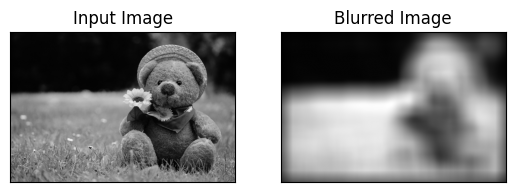

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and convert the image to grayscale
image = cv2.imread('/content/teddy.jpg', cv2.IMREAD_GRAYSCALE)
rows, cols = image.shape

# Function to apply linear filtering
def apply_filter(image, kernel):
    k_rows, k_cols = kernel.shape
    padded_image = np.pad(image, ((k_rows // 2, k_rows // 2), (k_cols // 2, k_cols // 2)), mode='constant')
    filtered_image = np.zeros_like(image, dtype=np.float32)

    for i in range(rows):
        for j in range(cols):
            region = padded_image[i:i + k_rows, j:j + k_cols]
            filtered_image[i, j] = np.sum(region * kernel)

    return filtered_image

# Function to create a blurring kernel based on user input
def create_blur_kernel(size):
    kernel = np.ones((size, size), dtype=np.float32) / (size * size)
    return kernel

# Get the kernel size from the user
kernel_size = int(input("Enter the kernel size (e.g., 3 for a 3x3 kernel): "))

# Create the blurring kernel
blur_kernel = create_blur_kernel(kernel_size)

# Apply the blurring filter
blurred_image = apply_filter(image, blur_kernel)

# Display the results
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(blurred_image, cmap='gray')
plt.title('Blurred Image'), plt.xticks([]), plt.yticks([])
plt.show()


Enter the kernel size (odd number, e.g., 3 for a 3x3 kernel): 7
Enter the sigma value (e.g., 1.0): 0.2


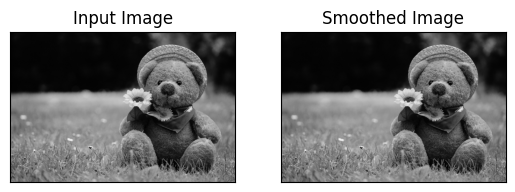

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and convert the image to grayscale
image = cv2.imread('/content/teddy.jpg', cv2.IMREAD_GRAYSCALE)
rows, cols = image.shape

# Function to create a Gaussian kernel
def create_gaussian_kernel(size, sigma):
    k = size // 2
    x, y = np.mgrid[-k:k+1, -k:k+1]
    kernel = np.exp(-(x**2 + y**2) / (2 * sigma**2))
    kernel = kernel / kernel.sum()
    return kernel

# Function to apply linear filtering
def apply_filter(image, kernel):
    k_rows, k_cols = kernel.shape
    padded_image = np.pad(image, ((k_rows // 2, k_cols // 2), (k_cols // 2, k_cols // 2)), mode='constant')
    filtered_image = np.zeros_like(image, dtype=np.float32)

    for i in range(rows):
        for j in range(cols):
            region = padded_image[i:i + k_rows, j:j + k_cols]
            filtered_image[i, j] = np.sum(region * kernel)

    return filtered_image

# Get the kernel size and sigma from the user
kernel_size = int(input("Enter the kernel size (odd number, e.g., 3 for a 3x3 kernel): "))
sigma = float(input("Enter the sigma value (e.g., 1.0): "))

# Create the Gaussian kernel
gaussian_kernel = create_gaussian_kernel(kernel_size, sigma)

# Apply the Gaussian blur
smoothed_image = apply_filter(image, gaussian_kernel)


# Display the results
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(smoothed_image, cmap='gray')
plt.title('Smoothed Image'), plt.xticks([]), plt.yticks([])
plt.show()


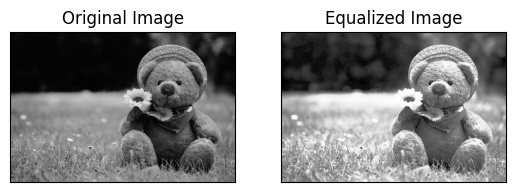

In [ ]:


# Function to calculate the histogram of the image
def calculate_histogram(image):
    histogram = np.zeros(256, dtype=int)
    rows, cols = image.shape
    for i in range(rows):
        for j in range(cols):
            histogram[image[i, j]] += 1
    return histogram

# Function to perform histogram equalization
def histogram_equalization(image):
    histogram = calculate_histogram(image)
    cdf = np.cumsum(histogram)  # Cumulative Distribution Function (CDF)
    cdf_normalized = cdf * (255 / cdf[-1])  # Normalize CDF
    equalized_image = np.interp(image.flatten(), range(256), cdf_normalized).reshape(image.shape)
    return equalized_image

# Apply histogram equalization
equalized_image = histogram_equalization(image)

# Display the results
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image'), plt.xticks([]), plt.yticks([])
plt.show()


Enter the threshold value (0-255): 128


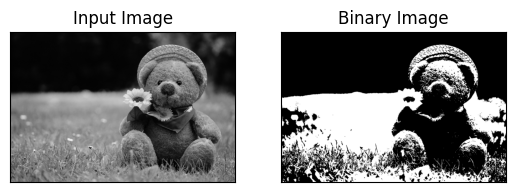

In [ ]:


# Function to apply thresholding
def apply_threshold(image, threshold):
    binary_image = np.zeros_like(image)
    binary_image[image > threshold] = 255  # Set pixels above the threshold to white
    binary_image[image <= threshold] = 0   # Set pixels below or equal to the threshold to black
    return binary_image

# Get the threshold value from the user
threshold = int(input("Enter the threshold value (0-255): "))

# Apply the thresholding
binary_image = apply_threshold(image, threshold)

# Display the results
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image'), plt.xticks([]), plt.yticks([])
plt.show()


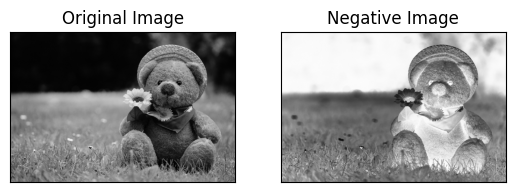

In [ ]:


# Function to perform negative transformation
def negative_transformation(image):
    negative_image = 255 - image
    return negative_image

# Apply the negative transformation
negative_image = negative_transformation(image)

# Display the results
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(negative_image, cmap='gray')
plt.title('Negative Image'), plt.xticks([]), plt.yticks([])
plt.show()


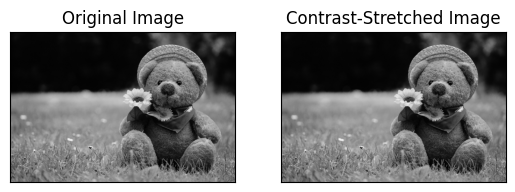

In [ ]:


# Get the minimum and maximum pixel values
fmin = np.min(image)
fmax = np.max(image)
bpp = 8  # Bit depth (8-bit image)

# Function to apply contrast stretching using the provided formula
def contrast_stretching(image, fmin, fmax, bpp):
    stretched_image = ((image - fmin) * (2**bpp) / (fmax - fmin)).astype(np.uint8)
    return stretched_image

# Apply contrast stretching
stretched_image = contrast_stretching(image, fmin, fmax, bpp)

# Display the results
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(stretched_image, cmap='gray')
plt.title('Contrast-Stretched Image'), plt.xticks([]), plt.yticks([])
plt.show()



Enter the horizontal shift value (dx): 1000
Enter the vertical shift value (dy): 1000


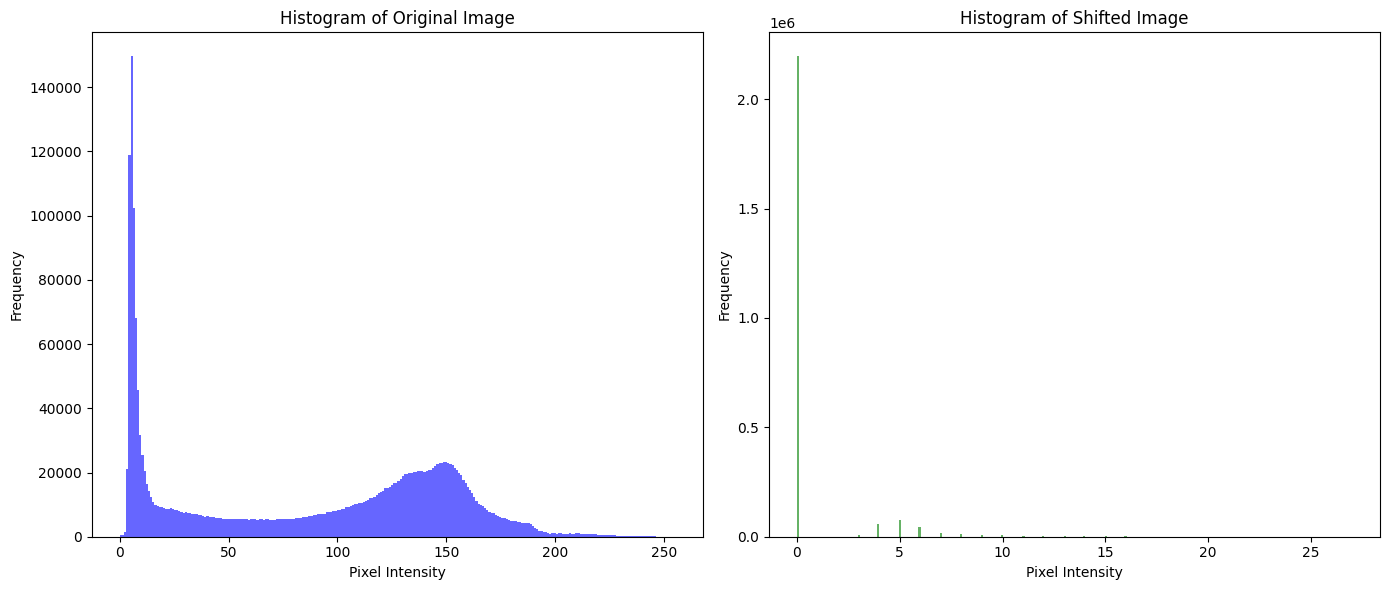

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to get user input for shifting
def get_user_input():
    dx = int(input("Enter the horizontal shift value (dx): "))
    dy = int(input("Enter the vertical shift value (dy): "))
    return dx, dy

# Function to shift the image
def shift_image(image, dx, dy):
    rows, cols = image.shape[:2]
    T = np.float32([[1, 0, dx], [0, 1, dy]])
    shifted_image = cv2.warpAffine(image, T, (cols, rows))
    return shifted_image

# Function to plot histograms
def plot_histograms(original_image, shifted_image):
    plt.figure(figsize=(14, 6))

    # Histogram for the original image
    plt.subplot(1, 2, 1)
    plt.hist(original_image.ravel(), bins=256, color='blue', alpha=0.6)
    plt.title('Histogram of Original Image')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

    # Histogram for the shifted image
    plt.subplot(1, 2, 2)
    plt.hist(shifted_image.ravel(), bins=256, color='green', alpha=0.6)
    plt.title('Histogram of Shifted Image')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Load an example image
image = cv2.imread('/content/teddy.jpg', cv2.IMREAD_GRAYSCALE)

# Get user input for shifting values
dx, dy = get_user_input()

# Shift the image
shifted_image = shift_image(image, dx, dy)

# Plot histograms for the original and shifted images
plot_histograms(image, shifted_image)


Enter the horizontal shift value (dx): 100
Enter the vertical shift value (dy): 100


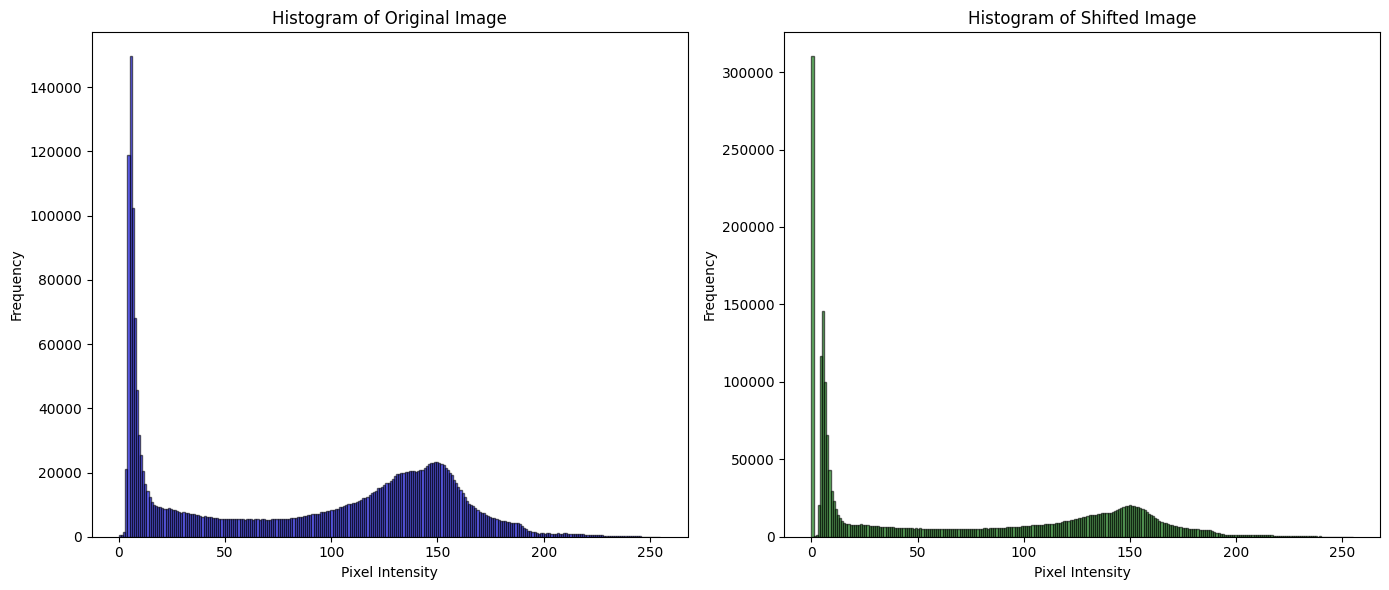

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to get user input for shifting
def get_user_input():
    dx = int(input("Enter the horizontal shift value (dx): "))
    dy = int(input("Enter the vertical shift value (dy): "))
    return dx, dy

# Function to shift the image
def shift_image(image, dx, dy):
    rows, cols = image.shape[:2]
    T = np.float32([[1, 0, dx], [0, 1, dy]])
    shifted_image = cv2.warpAffine(image, T, (cols, rows))
    return shifted_image

# Function to plot histograms
def plot_histograms(original_image, shifted_image):
    plt.figure(figsize=(14, 6))

    # Histogram for the original image
    plt.subplot(1, 2, 1)
    plt.hist(original_image.ravel(), bins=256, color='blue', alpha=0.6, edgecolor='black')
    plt.title('Histogram of Original Image')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

    # Histogram for the shifted image
    plt.subplot(1, 2, 2)
    plt.hist(shifted_image.ravel(), bins=256, color='green', alpha=0.6, edgecolor='black')
    plt.title('Histogram of Shifted Image')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Load an example image
image = cv2.imread('/content/teddy.jpg', cv2.IMREAD_GRAYSCALE)

# Get user input for shifting values
dx, dy = get_user_input()

# Shift the image
shifted_image = shift_image(image, dx, dy)

# Plot histograms for the original and shifted images
plot_histograms(image, shifted_image)


Enter the horizontal shift value (dx): 100
Enter the vertical shift value (dy): 100


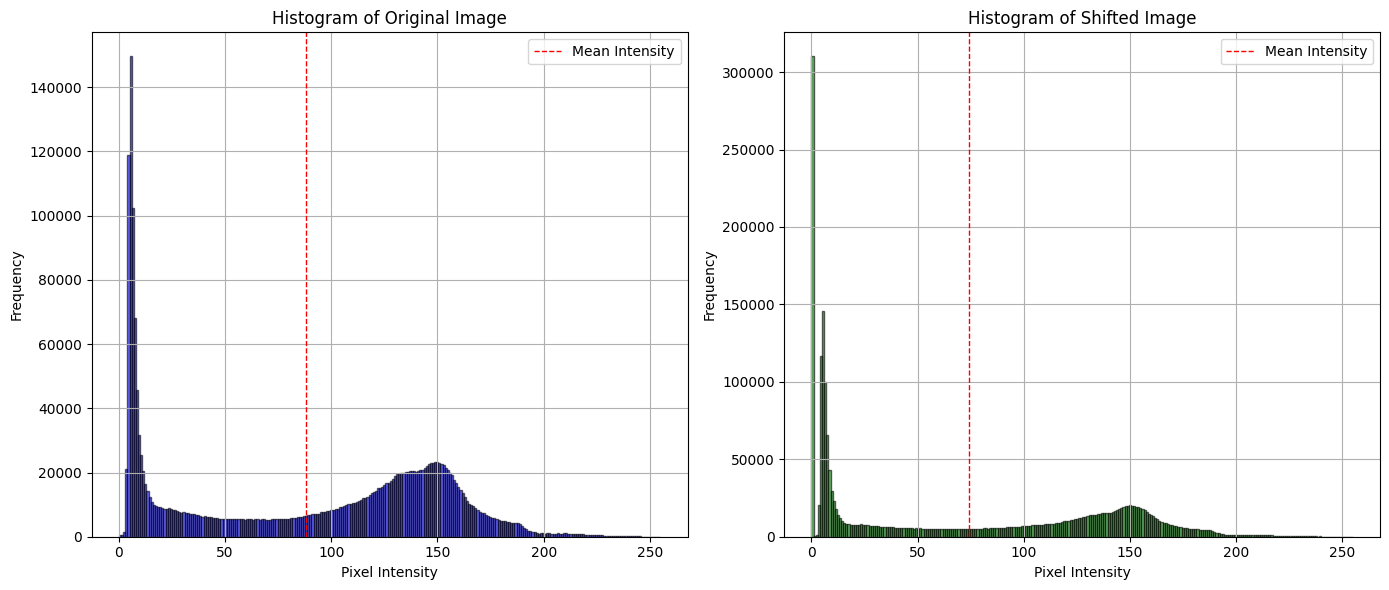

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to get user input for shifting
def get_user_input():
    dx = int(input("Enter the horizontal shift value (dx): "))
    dy = int(input("Enter the vertical shift value (dy): "))
    return dx, dy

# Function to shift the image
def shift_image(image, dx, dy):
    rows, cols = image.shape[:2]
    T = np.float32([[1, 0, dx], [0, 1, dy]])
    shifted_image = cv2.warpAffine(image, T, (cols, rows))
    return shifted_image

# Function to plot histograms with explainable bins
def plot_histograms(original_image, shifted_image):
    plt.figure(figsize=(14, 6))

    # Plotting the histogram for the original image
    plt.subplot(1, 2, 1)
    plt.hist(original_image.ravel(), bins=256, color='blue', alpha=0.6, edgecolor='black')
    plt.title('Histogram of Original Image')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.grid(True)

    # Annotations for better explanation
    plt.axvline(x=np.mean(original_image), color='red', linestyle='dashed', linewidth=1, label='Mean Intensity')
    plt.legend()

    # Plotting the histogram for the shifted image
    plt.subplot(1, 2, 2)
    plt.hist(shifted_image.ravel(), bins=256, color='green', alpha=0.6, edgecolor='black')
    plt.title('Histogram of Shifted Image')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.grid(True)

    # Annotations for better explanation
    plt.axvline(x=np.mean(shifted_image), color='red', linestyle='dashed', linewidth=1, label='Mean Intensity')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Load an example image
image = cv2.imread('/content/teddy.jpg', cv2.IMREAD_GRAYSCALE)

# Get user input for shifting values
dx, dy = get_user_input()

# Shift the image
shifted_image = shift_image(image, dx, dy)

# Plot histograms for the original and shifted images
plot_histograms(image, shifted_image)


Enter the horizontal shift value (dx): 100
Enter the vertical shift value (dy): 100


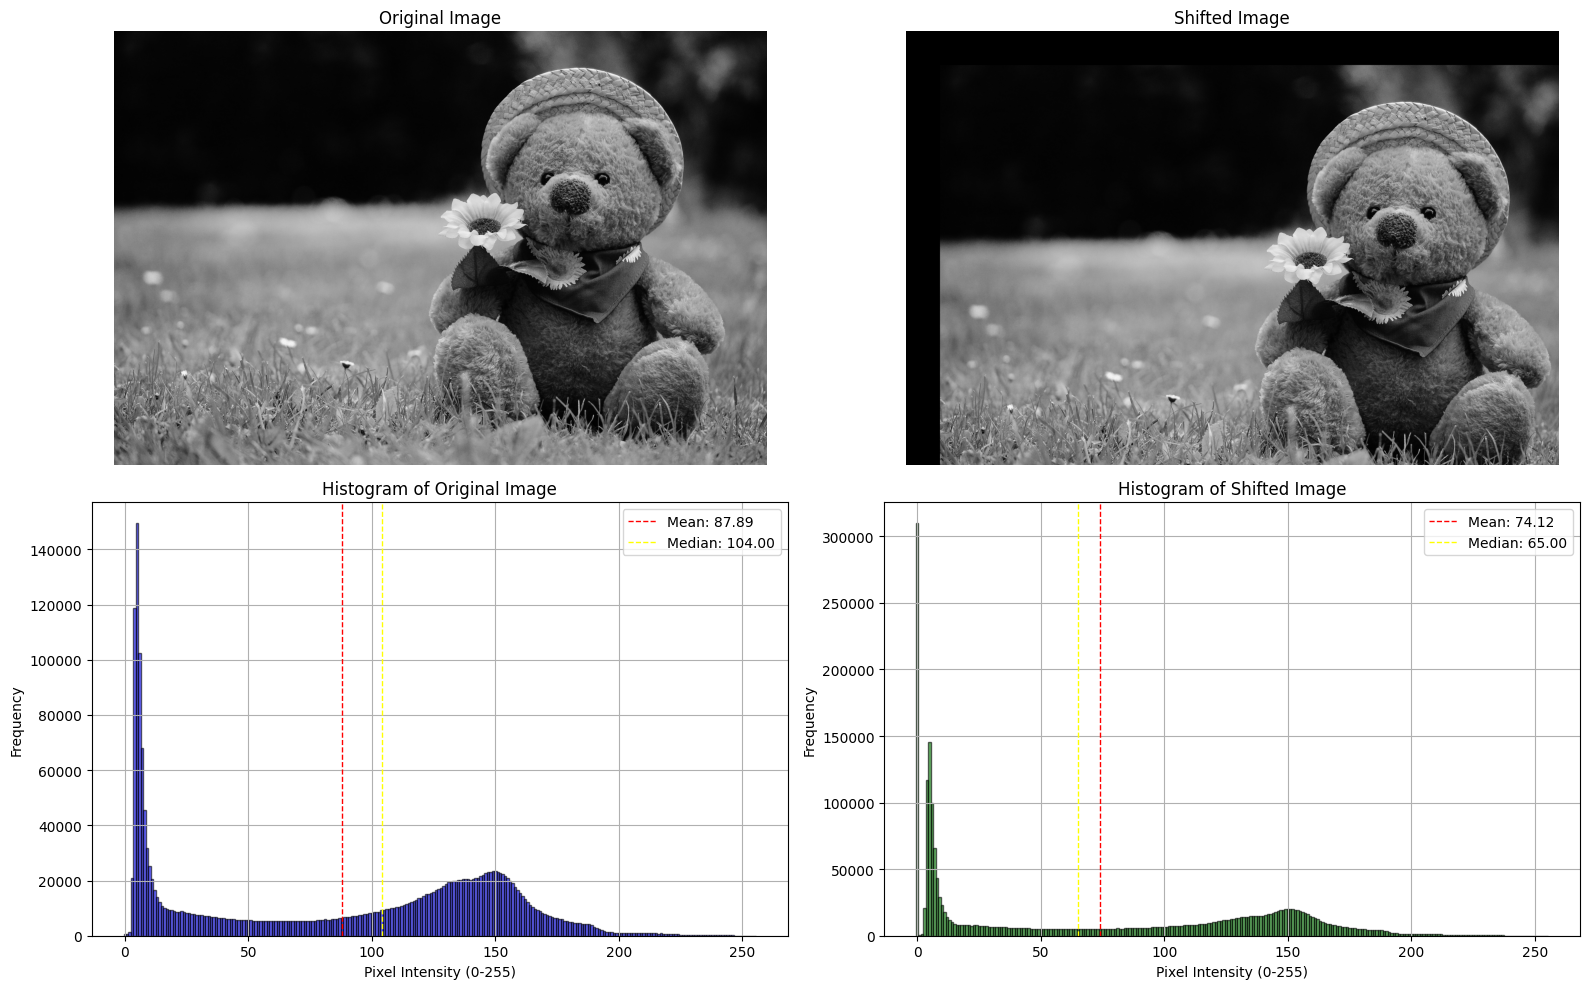

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to get user input for shifting
def get_user_input():
    dx = int(input("Enter the horizontal shift value (dx): "))
    dy = int(input("Enter the vertical shift value (dy): "))
    return dx, dy

# Function to shift the image
def shift_image(image, dx, dy):
    rows, cols = image.shape[:2]
    T = np.float32([[1, 0, dx], [0, 1, dy]])
    shifted_image = cv2.warpAffine(image, T, (cols, rows))
    return shifted_image

# Function to plot images and histograms with detailed explanations
def plot_images_and_histograms(original_image, shifted_image):
    plt.figure(figsize=(16, 10))

    # Plotting the original image
    plt.subplot(2, 2, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    # Plotting the shifted image
    plt.subplot(2, 2, 2)
    plt.imshow(shifted_image, cmap='gray')
    plt.title('Shifted Image')
    plt.axis('off')

    # Plotting the histogram for the original image
    plt.subplot(2, 2, 3)
    hist_original, bins_original = np.histogram(original_image, bins=256, range=(0, 256))
    plt.bar(bins_original[:-1], hist_original, width=1, color='blue', alpha=0.6, edgecolor='black')
    plt.title('Histogram of Original Image')
    plt.xlabel('Pixel Intensity (0-255)')
    plt.ylabel('Frequency')
    plt.grid(True)

    # Annotations for better explanation
    mean_original = np.mean(original_image)
    median_original = np.median(original_image)
    plt.axvline(x=mean_original, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_original:.2f}')
    plt.axvline(x=median_original, color='yellow', linestyle='dashed', linewidth=1, label=f'Median: {median_original:.2f}')
    plt.legend()

    # Plotting the histogram for the shifted image
    plt.subplot(2, 2, 4)
    hist_shifted, bins_shifted = np.histogram(shifted_image, bins=256, range=(0, 256))
    plt.bar(bins_shifted[:-1], hist_shifted, width=1, color='green', alpha=0.6, edgecolor='black')
    plt.title('Histogram of Shifted Image')
    plt.xlabel('Pixel Intensity (0-255)')
    plt.ylabel('Frequency')
    plt.grid(True)

    # Annotations for better explanation
    mean_shifted = np.mean(shifted_image)
    median_shifted = np.median(shifted_image)
    plt.axvline(x=mean_shifted, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_shifted:.2f}')
    plt.axvline(x=median_shifted, color='yellow', linestyle='dashed', linewidth=1, label=f'Median: {median_shifted:.2f}')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Load an example image
image = cv2.imread('/content/teddy.jpg', cv2.IMREAD_GRAYSCALE)

# Get user input for shifting values
dx, dy = get_user_input()

# Shift the image
shifted_image = shift_image(image, dx, dy)

# Plot images and histograms for the original and shifted images
plot_images_and_histograms(image, shifted_image)


Enter the histogram slide value (positive or negative integer): 100


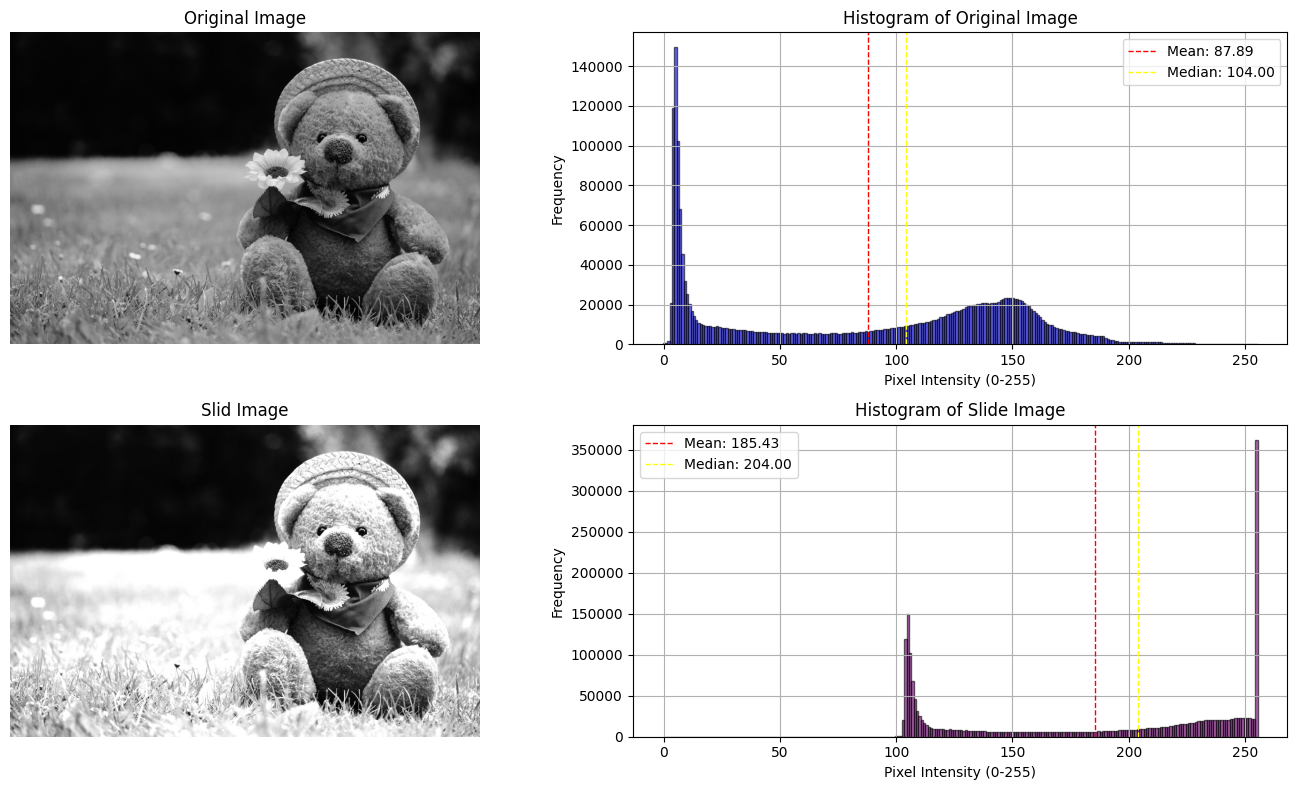

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to get user input for histogram sliding
def get_histogram_slide_value():
    slide_value = int(input("Enter the histogram slide value (positive or negative integer): "))
    return slide_value

# Function to slide the histogram of the image
def slide_histogram(image, slide_value):
    slid_image = image.astype(np.int16) + slide_value
    slid_image = np.clip(slid_image, 0, 255).astype(np.uint8)
    return slid_image

# Function to plot images and histograms with detailed explanations
def plot_images_and_histograms(original_image, slid_image):
    plt.figure(figsize=(14, 8))

    # Plotting the original image
    plt.subplot(2, 2, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    # Plotting the histogram for the original image
    plt.subplot(2, 2, 2)
    hist_original, bins_original = np.histogram(original_image, bins=256, range=(0, 256))
    plt.bar(bins_original[:-1], hist_original, width=1, color='blue', alpha=0.6, edgecolor='black')
    plt.title('Histogram of Original Image')
    plt.xlabel('Pixel Intensity (0-255)')
    plt.ylabel('Frequency')
    plt.grid(True)

    mean_original = np.mean(original_image)
    median_original = np.median(original_image)
    plt.axvline(x=mean_original, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_original:.2f}')
    plt.axvline(x=median_original, color='yellow', linestyle='dashed', linewidth=1, label=f'Median: {median_original:.2f}')
    plt.legend()

    # Plotting the slid image
    plt.subplot(2, 2, 3)
    plt.imshow(slid_image, cmap='gray')
    plt.title('Slid Image')
    plt.axis('off')

    # Plotting the histogram for the slid image
    plt.subplot(2, 2, 4)
    hist_slid, bins_slid = np.histogram(slid_image, bins=256, range=(0, 256))
    plt.bar(bins_slid[:-1], hist_slid, width=1, color='purple', alpha=0.6, edgecolor='black')
    plt.title('Histogram of Slide Image')
    plt.xlabel('Pixel Intensity (0-255)')
    plt.ylabel('Frequency')
    plt.grid(True)

    mean_slid = np.mean(slid_image)
    median_slid = np.median(slid_image)
    plt.axvline(x=mean_slid, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_slid:.2f}')
    plt.axvline(x=median_slid, color='yellow', linestyle='dashed', linewidth=1, label=f'Median: {median_slid:.2f}')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Load an example image
image = cv2.imread('/content/teddy.jpg', cv2.IMREAD_GRAYSCALE)

# Get user input for histogram sliding value
slide_value = get_histogram_slide_value()

# Slide the histogram of the original image
slid_image = slide_histogram(image, slide_value)

# Plot images and histograms for the original and slid images
plot_images_and_histograms(image, slid_image)
